In [5]:
#Load packages
import os
from src.battery_model import battery_model
from src.data_processing import process_data
from run import run_simulation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Load data

battery_spec_file = os.path.join('data', 'battery_specs.csv')
half_hourly_price_file = os.path.join('data', 'half_hourly_data.csv')
daily_price_file = os.path.join('data', 'daily_data.csv')

battery_specs_dict, all_data = process_data(battery_spec_file, half_hourly_price_file, daily_price_file)

In [7]:
output = run_simulation(battery_specs_dict, 
                        all_data, 
                        planning_horizon=144,
                        execution_horizon=48,  
                        delta_t=0.5,
                        trading_freq=[1, 1, 48], 
                        S_init=0)

  0%|          | 0/1096 [00:00<?, ?it/s]c:\Users\zhout\Documents\Resume\Aurora_interview\battery_optimization\src\run.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output = pd.concat((output, plan), ignore_index=True)
100%|██████████| 1096/1096 [19:11<00:00,  1.05s/it]


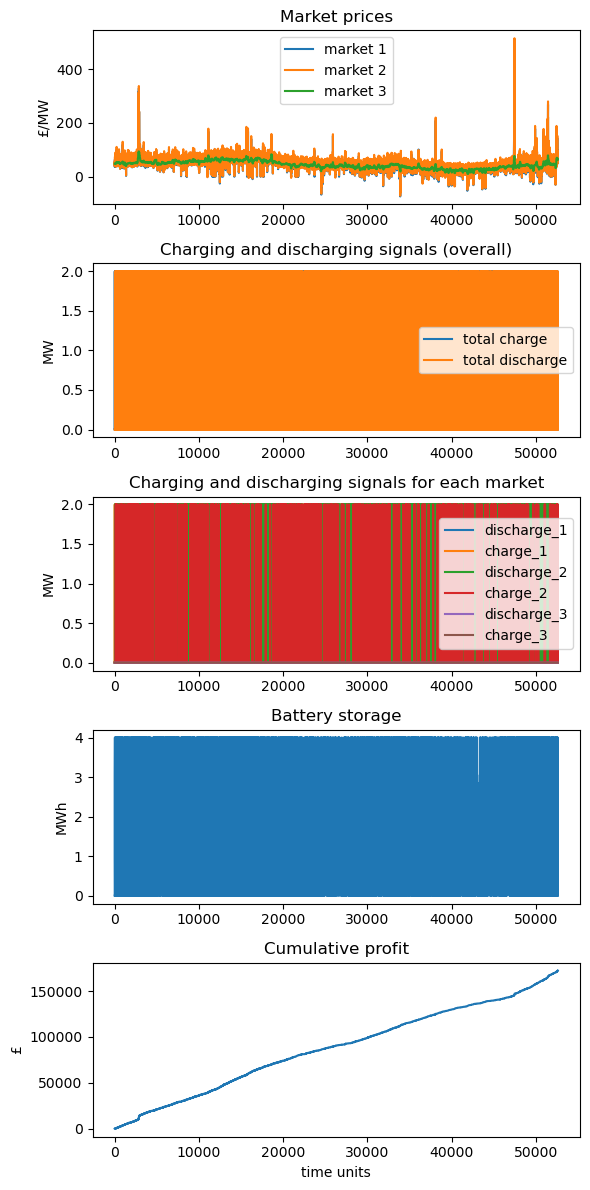

In [8]:
battery_model.plot_output(all_data, output)